## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [116]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import datetime
datetime.datetime.strptime

# SciKitLearn 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-notebook')# Your code here - remember to use markdown cells for comments as well!

In [117]:
kc_house_df = pd.read_csv('./data/kc_house_data.csv', parse_dates=['date']) # specify index_col=0 to avoid creating an "Unnamed: 0" column.

# specify parse date to avoid object dtype for dates

kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [118]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [119]:
kc_house_df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [120]:
kc_house_df.drop_duplicates(subset='id', inplace=True)

Dropping Duplicates

In [121]:
kc_house_df.corr()['price']

id              -0.018525
price            1.000000
bedrooms         0.309453
bathrooms        0.526229
sqft_living      0.701875
sqft_lot         0.089111
floors           0.256286
sqft_above       0.605294
yr_built         0.052906
yr_renovated     0.130341
zipcode         -0.052371
lat              0.305744
long             0.020983
sqft_living15    0.584549
sqft_lot15       0.082438
Name: price, dtype: float64

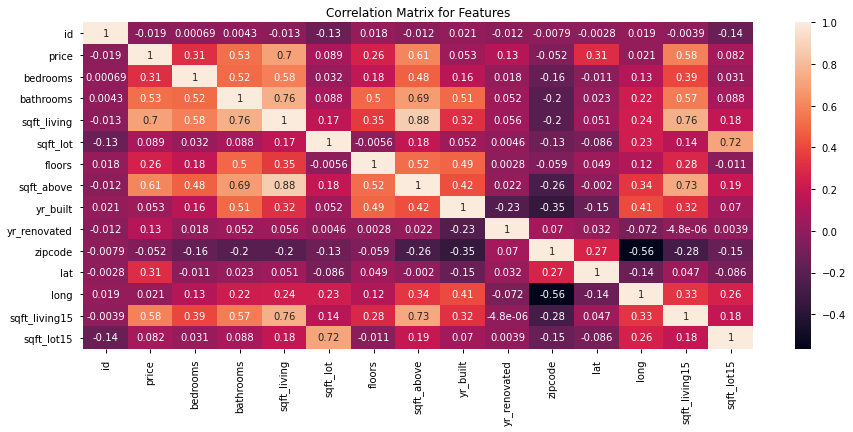

In [126]:
plt.figure(figsize=(15,6))
sns.heatmap(kc_house_df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

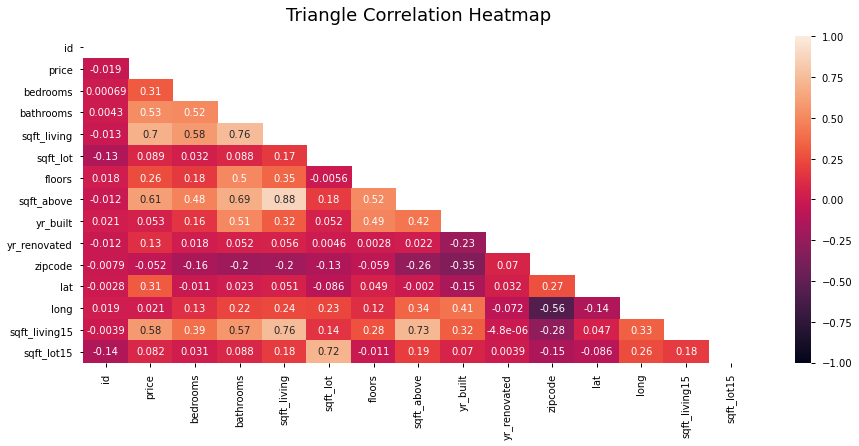

In [127]:
plt.figure(figsize=(15,6))

mask = np.triu(np.ones_like(kc_house_df.corr(), dtype=bool))
heatmap = sns.heatmap(kc_house_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

There is a high correlation between sqft_living and price.

There doesn not appear to be any correlation between yr_renovated and price. This is because it's connecting the year it was rennovated and the price. We should instead look at the connection of if a home has been rennovated, does it have a higher price.

/Users/kellymullaney/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


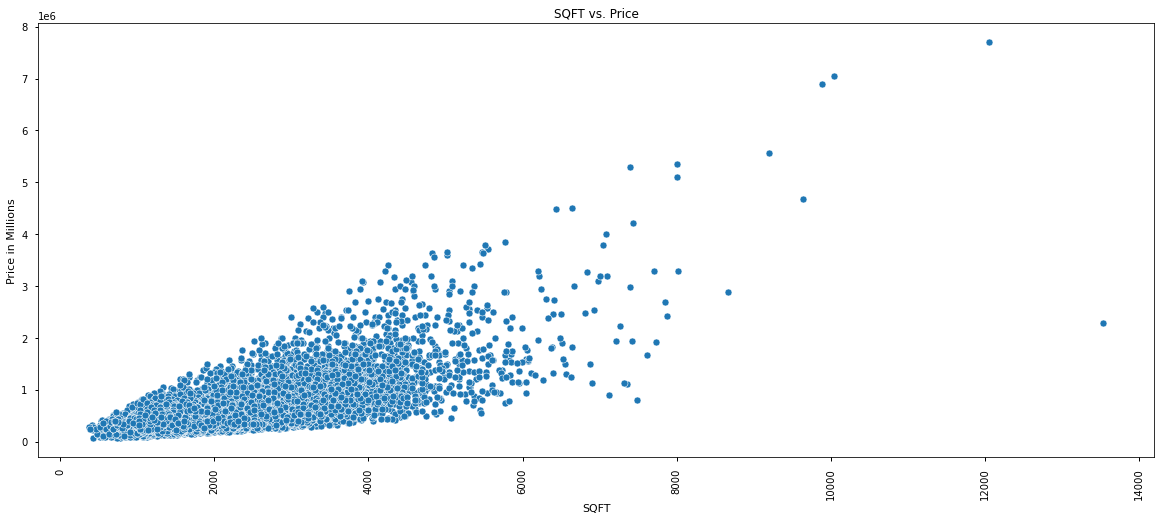

<Figure size 576x396 with 0 Axes>

In [96]:
#plot 'zipcode' vs. 'price'  distribution
plt.figure(figsize = (20, 8))
sns.scatterplot(kc_house_df['sqft_living'], kc_house_df['price'])
plt.title('SQFT vs. Price')
plt.xlabel('SQFT')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 10, rotation = 90)
plt.show()
plt.savefig('./Data/zipcode_vs_price_scatter')

In [97]:
columns = ['sqft_living', 'bathrooms', 'bedrooms']
X = kc_house_df[columns]
y = kc_house_df['price']
baseline_model = sm.add_constant(X)
baseline_results = sm.OLS(y, baseline_model).fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7339.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:14:52   Log-Likelihood:            -2.9733e+05
No. Observations:               21420   AIC:                         5.947e+05
Df Residuals:                   21416   BIC:                         5.947e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.557e+04   7004.040     10.789      0.000    6.18e+04    8.93e+04
sqft_living   310.1027      3.116     99.511      0.000     303.995     316.211
bathrooms    8329.7652   3543.545      2.351      0.019    1384.152    1.53e+04
bedrooms    -5.882e+04   2365.329    -24.868      0.000   -6.35e+04   -5.42e+04
==============================================================================
Omnibus:                    14305.196   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486989.201
Skew:                           2.736   Prob(JB):                         0.00
Kurtosis:                      25.709   Cond. No.                     9.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In order to determine if a home has been renovated or not, we are creating a column called recent_reno that shows if a home has been renovated in the last 15 years.

In [98]:
kc_house_df['yr_renovated'].fillna(0, inplace=True)

In [99]:
#creating reno column
# kc_house_df['renovated'] = 0
# kc_house_df.loc[kc_house_df['yr_renovated'] > 1, 'renovated'] = 1

#creating recent reno column
kc_house_df['recent_reno'] = 0
kc_house_df.loc[kc_house_df['yr_renovated'] > 2000, 'recent_reno'] = 1

In [100]:
kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,recent_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


In [101]:
kc_house_df['recent_reno'].value_counts()

0    21070
1      350
Name: recent_reno, dtype: int64

In [102]:
kc_house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,recent_reno
id,1.000000,-0.018525,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.011794,0.021171,-0.010857,-0.007934,-0.002766,0.019336,-0.003883,-0.139429,-0.006911
price,-0.018525,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.605294,0.052906,0.118484,-0.052371,0.305744,0.020983,0.584549,0.082438,0.102662
bedrooms,0.000691,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,0.480242,0.155241,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570,0.032677
bathrooms,0.004343,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.686328,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760,0.057868
sqft_living,-0.013451,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.876533,0.316646,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837,0.046518
sqft_lot,-0.132648,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.183210,0.052312,0.004991,-0.129422,-0.085822,0.230265,0.143805,0.717743,-0.014492
floors,0.018139,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.522751,0.488935,0.003141,-0.058532,0.048900,0.124812,0.279071,-0.011367,0.002322
sqft_above,-0.011794,0.605294,0.480242,0.686328,0.876533,0.183210,0.522751,1.000000,0.422977,0.020078,-0.260803,-0.002040,0.344161,0.731887,0.194445,0.012118
yr_built,0.021171,0.052906,0.155241,0.506252,0.316646,0.052312,0.488935,0.422977,1.000000,-0.203147,-0.346162,-0.148857,0.409173,0.324715,0.070125,-0.123500
yr_renovated,-0.010857,0.118484,0.017470,0.047686,0.050851,0.004991,0.003141,0.020078,-0.203147,1.000000,0.062291,0.027776,-0.064848,0.000812,0.004317,0.685747


In [103]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     19067 non-null  object        
 9   view           21357 non-null  object        
 10  condition      21420 non-null  object        
 11  grade          21420 non-null  object        
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  21420 non-null  object        
 14  yr_built       21420 non-null  int64         
 15  yr_renovated   2142

Dropping the following features that we aren't interesed in observing with regards to renovations

In [104]:
kc_house_df.drop(columns= ['waterfront', 'view', 'sqft_above','sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', ], inplace=True)

In [105]:
kc_house_df['grade'] = kc_house_df['grade'].str.split().apply(lambda x: x[0])
kc_house_df['grade'] = kc_house_df['grade'].astype(int)

In [106]:
kc_house_df['condition'].value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [108]:
condition_results = (3 * ['Average'])
condition_results.extend(3 * ['Good'])
condition_results.extend(3 * ['Very Good'])
condition_results.extend(3 * ['Fair'])
condition_results.extend(3 * ['Poor'])

np.random.seed(42)
np.random.shuffle(condition_results)
condition_preds = pd.DataFrame(condition_results)
condition_preds

,0
0,Fair
1,Fair
2,Average
3,Poor
4,Good
5,Very Good
6,Average
7,Average
8,Poor
9,Good


In [110]:
categories =  [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
ords = OrdinalEncoder(categories=categories)
ords.fit(condition_preds)
ords.transform(condition_preds)

array([[1.],
       [1.],
       [2.],
       [0.],
       [3.],
       [4.],
       [2.],
       [2.],
       [0.],
       [3.],
       [4.],
       [1.],
       [0.],
       [3.],
       [4.]])

In [113]:
sqft_filter = kc_house_df[(kc_house_df['sqft_living'] > 1800) & (kc_house_df['sqft_living'] < 2800)]
sqft_filter

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,recent_reno
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,Average,7,1951,1991.0,98125,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,Very Good,7,1965,0.0,98136,0
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,Average,7,2003,0.0,98038,0
14,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,Average,7,1900,0.0,98107,0
16,1875500060,2014-07-31,395000.0,3,2.00,1890,14040,2.0,Average,7,1994,0.0,98019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,4140940150,2014-10-02,572000.0,4,2.75,2770,3852,2.0,Average,8,2014,0.0,98178,0
21578,5087900040,2014-10-17,350000.0,4,2.75,2500,5995,2.0,Average,8,2008,0.0,98042,0
21587,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,Average,8,2003,0.0,98065,0
21589,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,Average,9,2014,0.0,98056,0


In [114]:
sqft_filter.groupby('recent_reno').agg(['mean'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,yr_renovated,zipcode
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
recent_reno,,,,,,,,,,,
0,4.684811e+09,526785.493808,3.623452,2.293827,2239.264061,15027.653509,1.532185,7.764448,1974.528251,40.471491,98071.515738
1,4.566401e+09,726089.661417,3.629921,2.523622,2309.417323,10563.244094,1.602362,7.874016,1943.622047,2008.472441,98104.228346
